In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
from tensorflow.keras.utils import to_categorical

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(train_labels.shape)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def load_dataset():
	(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
	train_labels = to_categorical(train_labels)
	test_labels = to_categorical(test_labels)
	return train_images, train_labels, test_images, test_labels

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(50000, 1)


In [4]:
categories = ['airplane' , 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss= keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [7]:
train_images_norm = train_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

In [8]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 16s 19ms/step - loss: 1.7618 - accuracy: 0.3460 - val_loss: 1.4852 - val_accuracy: 0.4539
Epoch 2/10
274/274 [==============================] - 4s 15ms/step - loss: 1.3872 - accuracy: 0.4959 - val_loss: 1.3268 - val_accuracy: 0.5175
Epoch 3/10
274/274 [==============================] - 4s 14ms/step - loss: 1.2444 - accuracy: 0.5569 - val_loss: 1.3701 - val_accuracy: 0.5198
Epoch 4/10
274/274 [==============================] - 4s 14ms/step - loss: 1.1416 - accuracy: 0.5927 - val_loss: 1.1605 - val_accuracy: 0.5876
Epoch 5/10
274/274 [==============================] - 4s 14ms/step - loss: 1.0409 - accuracy: 0.6311 - val_loss: 1.1206 - val_accuracy: 0.6059
Epoch 6/10
274/274 [==============================] - 4s 14ms/step - loss: 0.9656 - accuracy: 0.6610 - val_loss: 1.0973 - val_accuracy: 0.6127
Epoch 7/10
274/274 [==============================] - 4s 14ms/step - loss: 0.9020 - accuracy: 0.6860 - val_loss: 1.0476 - val_accuracy: 0.630

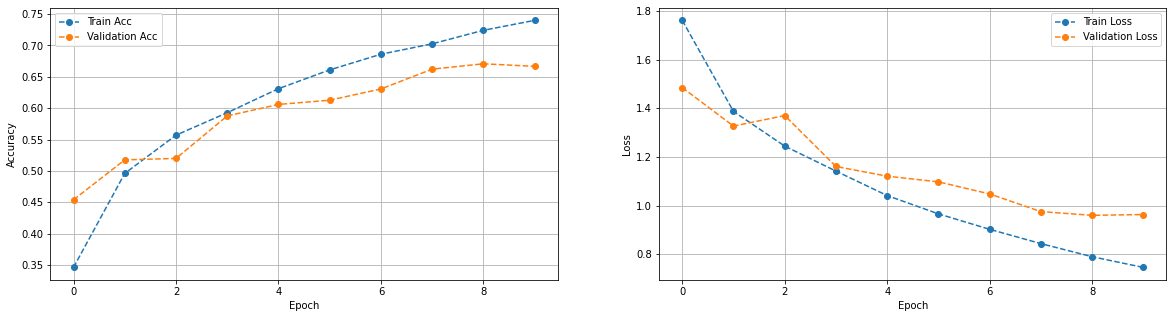

In [9]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [10]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
274/274 [==============================] - 4s 14ms/step - loss: 0.7042 - accuracy: 0.7527 - val_loss: 0.9359 - val_accuracy: 0.6840
Epoch 2/15
274/274 [==============================] - 4s 14ms/step - loss: 0.6574 - accuracy: 0.7716 - val_loss: 0.9741 - val_accuracy: 0.6749
Epoch 3/15
274/274 [==============================] - 4s 14ms/step - loss: 0.6020 - accuracy: 0.7889 - val_loss: 0.9584 - val_accuracy: 0.6863
Epoch 4/15
274/274 [==============================] - 4s 14ms/step - loss: 0.5700 - accuracy: 0.8007 - val_loss: 1.0122 - val_accuracy: 0.6831
Epoch 5/15
274/274 [==============================] - 4s 14ms/step - loss: 0.5310 - accuracy: 0.8135 - val_loss: 1.0024 - val_accuracy: 0.6817
Epoch 6/15
274/274 [==============================] - 4s 14ms/step - loss: 0.4996 - accuracy: 0.8249 - val_loss: 1.0169 - val_accuracy: 0.6765
Epoch 7/15
274/274 [==============================] - 4s 14ms/step - loss: 0.4544 - accuracy: 0.8406 - val_loss: 1.0483 - val_accuracy: 0.6883

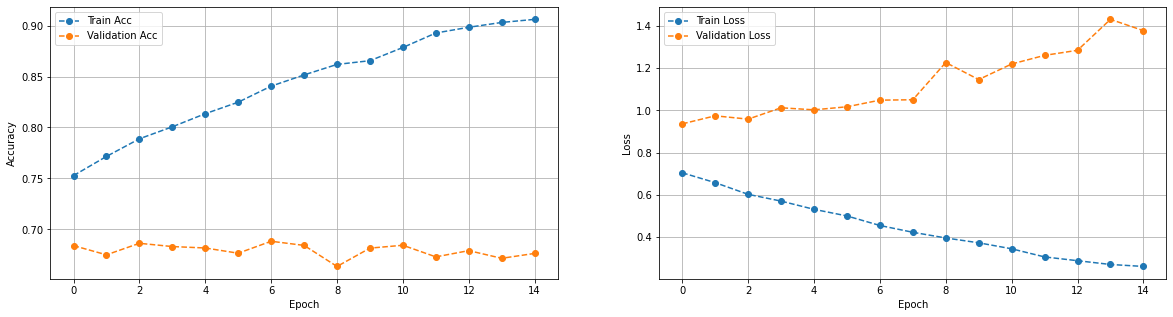

In [11]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [12]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=128, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 4s 15ms/step - loss: 0.2236 - accuracy: 0.9195 - val_loss: 1.4569 - val_accuracy: 0.6841
Epoch 2/20
274/274 [==============================] - 4s 14ms/step - loss: 0.2183 - accuracy: 0.9209 - val_loss: 1.4925 - val_accuracy: 0.6821
Epoch 3/20
274/274 [==============================] - 4s 14ms/step - loss: 0.1912 - accuracy: 0.9325 - val_loss: 1.6750 - val_accuracy: 0.6741
Epoch 4/20
274/274 [==============================] - 4s 14ms/step - loss: 0.1956 - accuracy: 0.9308 - val_loss: 1.6201 - val_accuracy: 0.6775
Epoch 5/20
274/274 [==============================] - 4s 13ms/step - loss: 0.1742 - accuracy: 0.9383 - val_loss: 1.7496 - val_accuracy: 0.6818
Epoch 6/20
274/274 [==============================] - 4s 14ms/step - loss: 0.1599 - accuracy: 0.9427 - val_loss: 1.6667 - val_accuracy: 0.6739
Epoch 7/20
274/274 [==============================] - 4s 14ms/step - loss: 0.1528 - accuracy: 0.9454 - val_loss: 1.8273 - val_accuracy: 0.6734

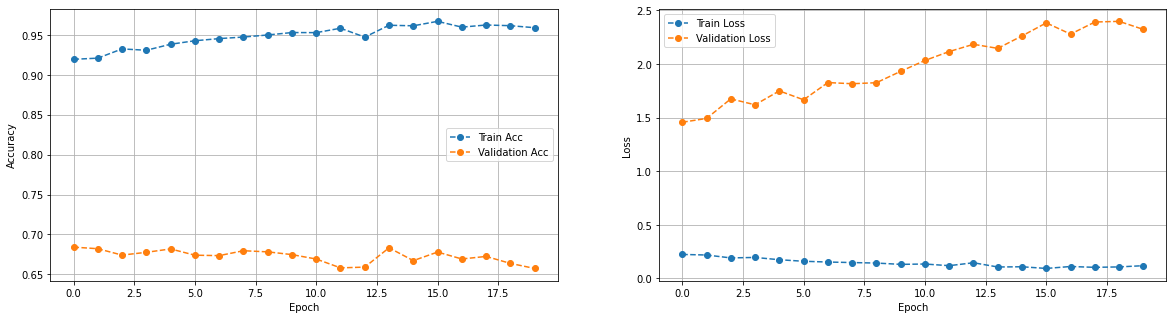

In [13]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [14]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=25, batch_size=128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 4s 15ms/step - loss: 0.1015 - accuracy: 0.9648 - val_loss: 2.4232 - val_accuracy: 0.6747
Epoch 2/25
274/274 [==============================] - 4s 14ms/step - loss: 0.0761 - accuracy: 0.9735 - val_loss: 2.4608 - val_accuracy: 0.6679
Epoch 3/25
274/274 [==============================] - 4s 14ms/step - loss: 0.0850 - accuracy: 0.9700 - val_loss: 2.5701 - val_accuracy: 0.6741
Epoch 4/25
274/274 [==============================] - 4s 14ms/step - loss: 0.1176 - accuracy: 0.9595 - val_loss: 2.5573 - val_accuracy: 0.6679
Epoch 5/25
274/274 [==============================] - 4s 14ms/step - loss: 0.1048 - accuracy: 0.9625 - val_loss: 2.3881 - val_accuracy: 0.6661
Epoch 6/25
274/274 [==============================] - 4s 14ms/step - loss: 0.0789 - accuracy: 0.9723 - val_loss: 2.5167 - val_accuracy: 0.6733
Epoch 7/25
274/274 [==============================] - 4s 14ms/step - loss: 0.0997 - accuracy: 0.9649 - val_loss: 2.4604 - val_accuracy: 0.6678

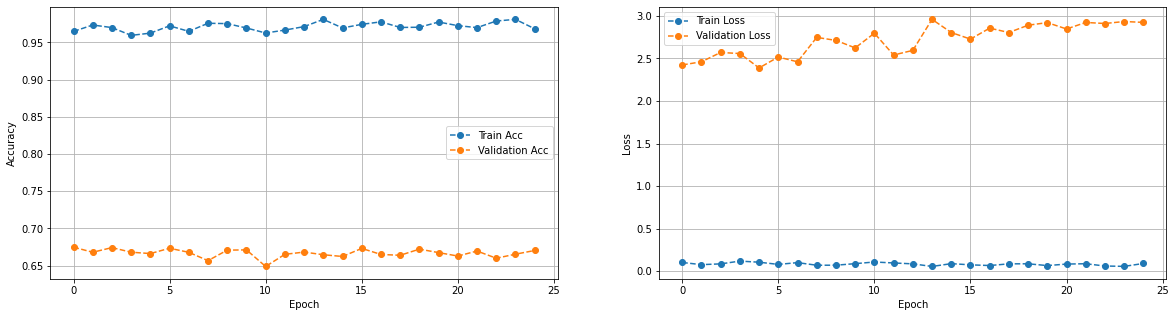

In [15]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [16]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
274/274 [==============================] - 4s 16ms/step - loss: 0.0643 - accuracy: 0.9778 - val_loss: 2.9713 - val_accuracy: 0.6728
Epoch 2/30
274/274 [==============================] - 4s 14ms/step - loss: 0.0879 - accuracy: 0.9707 - val_loss: 2.9519 - val_accuracy: 0.6664
Epoch 3/30
274/274 [==============================] - 4s 14ms/step - loss: 0.0570 - accuracy: 0.9801 - val_loss: 3.1276 - val_accuracy: 0.6654
Epoch 4/30
274/274 [==============================] - 4s 14ms/step - loss: 0.0587 - accuracy: 0.9794 - val_loss: 3.0821 - val_accuracy: 0.6623
Epoch 5/30
274/274 [==============================] - 4s 16ms/step - loss: 0.0771 - accuracy: 0.9747 - val_loss: 3.0249 - val_accuracy: 0.6704
Epoch 6/30
274/274 [==============================] - 4s 14ms/step - loss: 0.0594 - accuracy: 0.9801 - val_loss: 3.0534 - val_accuracy: 0.6681
Epoch 7/30
274/274 [==============================] - 4s 16ms/step - loss: 0.0886 - accuracy: 0.9712 - val_loss: 3.0025 - val_accuracy: 0.6681

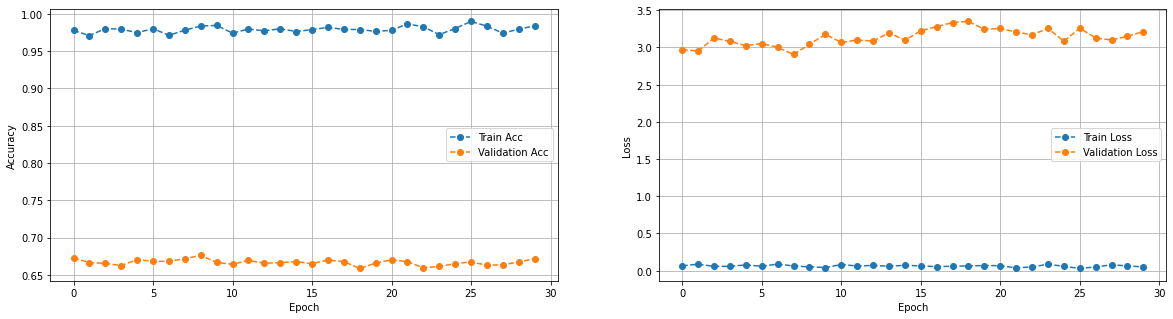

In [17]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [18]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=35, batch_size=128, validation_split=0.3)

Epoch 1/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 3.3741 - val_accuracy: 0.6686
Epoch 2/35
274/274 [==============================] - 4s 14ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 3.4137 - val_accuracy: 0.6641
Epoch 3/35
274/274 [==============================] - 4s 14ms/step - loss: 0.0656 - accuracy: 0.9786 - val_loss: 3.2884 - val_accuracy: 0.6702
Epoch 4/35
274/274 [==============================] - 4s 14ms/step - loss: 0.0541 - accuracy: 0.9810 - val_loss: 3.2988 - val_accuracy: 0.6639
Epoch 5/35
274/274 [==============================] - 4s 14ms/step - loss: 0.0525 - accuracy: 0.9821 - val_loss: 3.3755 - val_accuracy: 0.6625
Epoch 6/35
274/274 [==============================] - 4s 14ms/step - loss: 0.0725 - accuracy: 0.9772 - val_loss: 3.2223 - val_accuracy: 0.6593
Epoch 7/35
274/274 [==============================] - 4s 13ms/step - loss: 0.0416 - accuracy: 0.9862 - val_loss: 3.4223 - val_accuracy: 0.6641

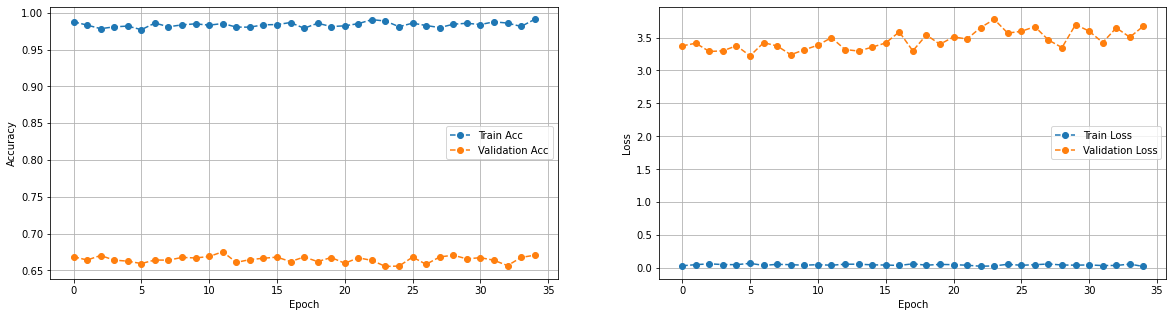

In [19]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [20]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=40, batch_size=128, validation_split=0.3)

Epoch 1/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0389 - accuracy: 0.9869 - val_loss: 3.7038 - val_accuracy: 0.6682
Epoch 2/40
274/274 [==============================] - 4s 14ms/step - loss: 0.0591 - accuracy: 0.9816 - val_loss: 3.6516 - val_accuracy: 0.6600
Epoch 3/40
274/274 [==============================] - 4s 14ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 3.6390 - val_accuracy: 0.6684
Epoch 4/40
274/274 [==============================] - 4s 14ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 3.8270 - val_accuracy: 0.6654
Epoch 5/40
274/274 [==============================] - 4s 13ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 3.5253 - val_accuracy: 0.6639
Epoch 6/40
274/274 [==============================] - 4s 14ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 3.6849 - val_accuracy: 0.6663
Epoch 7/40
274/274 [==============================] - 4s 14ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 3.6990 - val_accuracy: 0.6671

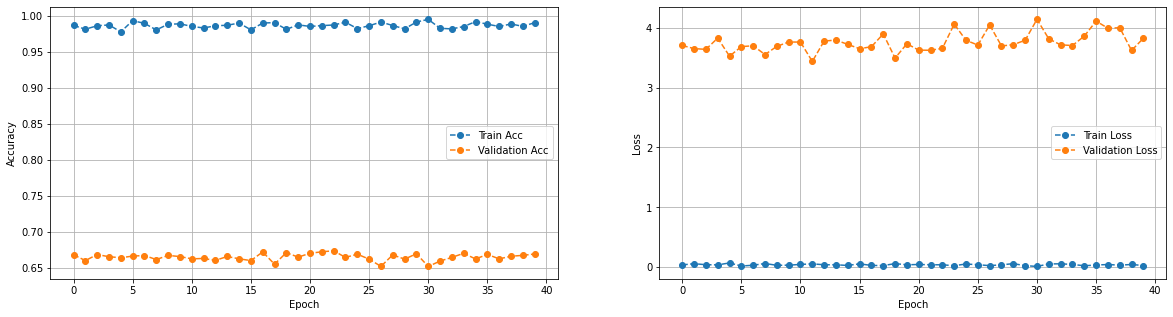

In [21]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [22]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=45, batch_size=128, validation_split=0.3)

Epoch 1/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 3.8496 - val_accuracy: 0.6603
Epoch 2/45
274/274 [==============================] - 4s 14ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 3.9188 - val_accuracy: 0.6701
Epoch 3/45
274/274 [==============================] - 4s 14ms/step - loss: 0.0391 - accuracy: 0.9885 - val_loss: 3.9309 - val_accuracy: 0.6660
Epoch 4/45
274/274 [==============================] - 4s 13ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 3.9203 - val_accuracy: 0.6670
Epoch 5/45
274/274 [==============================] - 4s 14ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 3.8286 - val_accuracy: 0.6631
Epoch 6/45
274/274 [==============================] - 4s 14ms/step - loss: 0.0266 - accuracy: 0.9909 - val_loss: 3.9680 - val_accuracy: 0.6659
Epoch 7/45
274/274 [==============================] - 4s 13ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 4.0114 - val_accuracy: 0.6623

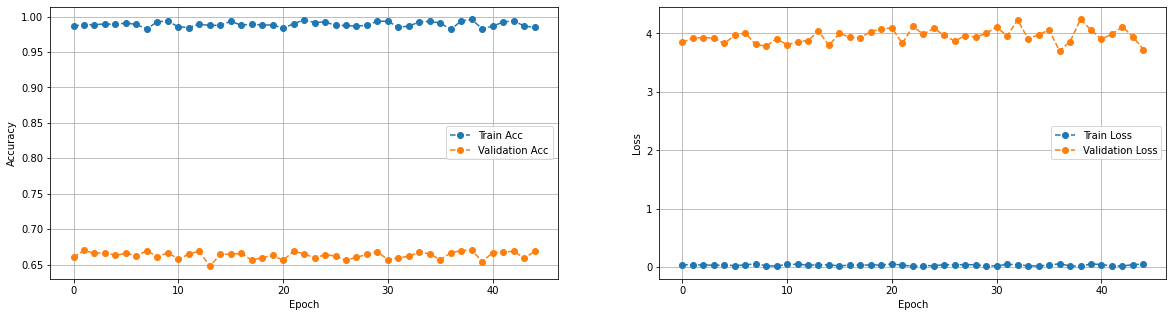

In [23]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [26]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 5s 17ms/step - loss: 0.0417 - accuracy: 0.9878 - val_loss: 4.1428 - val_accuracy: 0.6671
Epoch 2/50
274/274 [==============================] - 4s 14ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 4.3103 - val_accuracy: 0.6630
Epoch 3/50
274/274 [==============================] - 4s 14ms/step - loss: 0.0323 - accuracy: 0.9904 - val_loss: 4.0845 - val_accuracy: 0.6653
Epoch 4/50
274/274 [==============================] - 4s 14ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 4.4193 - val_accuracy: 0.6667
Epoch 5/50
274/274 [==============================] - 4s 14ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 4.2764 - val_accuracy: 0.6675
Epoch 6/50
274/274 [==============================] - 4s 14ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 4.4003 - val_accuracy: 0.6645
Epoch 7/50
274/274 [==============================] - 4s 14ms/step - loss: 0.0331 - accuracy: 0.9905 - val_loss: 4.3460 - val_accuracy: 0.6661

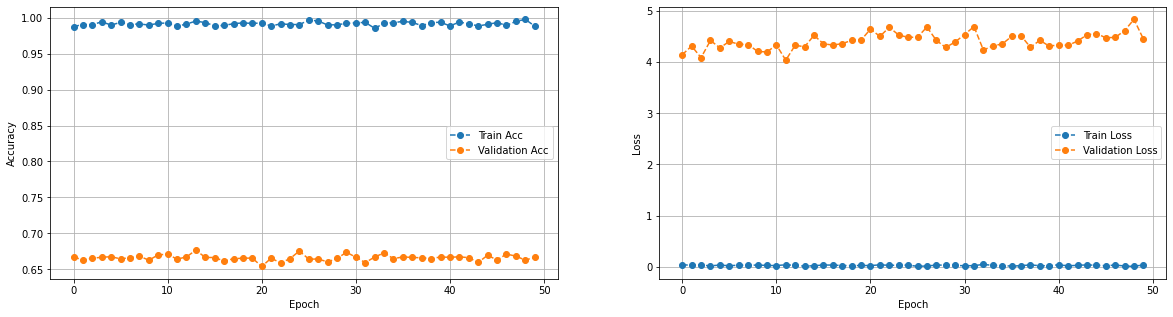

In [27]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()